In [91]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

import missingno as msno

import requests
import json

import geopandas

import os

pd.set_option("display.max_columns", None)

In [2]:
class BasicAnalytics:
    def __init__(self, data):
        self.data = data

    def describe(self):
        print(self.data.describe())

    def correlation(self):
        print(self.data.corr())

    def missing_values(self):
        print(self.data.isnull().sum())

    def outliers(self, column):
        q1 = self.data[column].quantile(0.25)
        q3 = self.data[column].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5*iqr
        lower_bound = q1 - 1.5*iqr
        outliers = self.data[(self.data[column] < lower_bound) | (self.data[column] > upper_bound)]
        print("Number of outliers:", outliers.shape[0])
        print(outliers)

    def histogram(self, column):
        self.data[column].hist(bins=10)

    def boxplot(self, column):
        self.data.boxplot(column)

    def scatterplot(self, x_column, y_column):
        self.data.plot.scatter(x_column, y_column)

    def pivot_table(self, values_column, index_columns, aggfunc=np.mean):
        table = pd.pivot_table(self.data, values=values_column, index=index_columns, aggfunc=aggfunc)
        print(table)

    def group_by(self, group_columns, agg_dict):
        result = self.data.groupby(group_columns).agg(agg_dict)
        print(result)


In [3]:
def summary_table(df):
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes,
                                  null = df.isna().sum(),
                                  null_pct = round(df.isna().sum() / len(df) *100,2),
                                  unique = df.nunique(),
                                uniqueSample = [list(df[i].drop_duplicates().sample(2)) for i in df.columns]
                               )
                           ).reset_index(drop=True)
    summary['unique_pct'] = round(summary['unique'] / len(df) *100,2)
    return summary

In [4]:
# Set up variables for the folder path and file extension
folder_path = '/Jupyter/Perqara/data/'
file_extension = '.csv'

# Define a function to read in a single CSV file and return a dataframe
def read_csv_file(filename):
    df = pd.read_csv(filename)
    # Add any necessary data cleaning or transformation steps here
    return df

# Loop through the CSV files in the folder and read them into a dictionary of dataframes
dataframes = {}
for file_name in os.listdir(folder_path):
    if file_name.endswith(file_extension):
        # Extract the filename without the extension
        name = os.path.splitext(file_name)[0]
        # Read in the CSV file as a Pandas dataframe
        file_path = os.path.join(folder_path, file_name)
        df = read_csv_file(file_path)
        # Add the dataframe to the dictionary
        dataframes[name] = df

In [5]:
for i in dataframes:
    display(print(f"Dataset : {i}"),summary_table(dataframes[i]))

NumExpr defaulting to 8 threads.


Dataset : customers_dataset


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,customer_id,object,0,0.0,99441,"[a880f8d0c075976e7d2c54dc556779d9, 9e77a8bef5c8d0d18d57eafa802300c8]",100.00
1,customer_unique_id,object,0,0.0,96096,"[60ba6c553aff4ebee7abb97bab9fe91c, 3732057b80d20e5cb53b859b7bc57a78]",96.64
2,customer_zip_code_prefix,int64,0,0.0,14994,"[46500, 91349]",15.08
3,customer_city,object,0,0.0,4119,"[anhandui, indiapora]",4.14
4,customer_state,object,0,0.0,27,"[AC, BA]",0.03


Dataset : geolocation_dataset


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,geolocation_zip_code_prefix,int64,0,0.0,19015,"[26272, 38072]",1.90
1,geolocation_lat,float64,0,0.0,717360,"[-23.608522728836068, -29.76552529087078]",71.72
2,geolocation_lng,float64,0,0.0,717613,"[-46.816367757718496, -43.17655078795658]",71.75
3,geolocation_city,object,0,0.0,8011,"[quarai, frutuoso gomes]",0.80
4,geolocation_state,object,0,0.0,27,"[AP, RO]",0.00


Dataset : orders_dataset


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,order_id,object,0,0.00,99441,"[ea60e9579f440bbca132b795ff54807f, 3d22c7028328c46be79ac9803a61e5c7]",100.00
1,customer_id,object,0,0.00,99441,"[64e37599865347bc3329d0d79faa8c4d, ec5b7c2e69bc8d387c31867ce2eaa513]",100.00
2,order_status,object,0,0.00,8,"[approved, processing]",0.01
3,order_purchase_timestamp,object,0,0.00,98875,"[2018-06-02 20:05:41, 2017-12-14 13:35:10]",99.43
4,order_approved_at,object,160,0.16,90733,"[2017-10-30 12:10:23, 2017-10-28 07:06:15]",91.24
5,order_delivered_carrier_date,object,1783,1.79,81018,"[2018-01-10 10:39:29, 2018-05-09 15:30:00]",81.47
6,order_delivered_customer_date,object,2965,2.98,95664,"[2017-08-30 18:52:50, 2018-08-14 22:03:53]",96.20
7,order_estimated_delivery_date,object,0,0.00,459,"[2017-10-24 00:00:00, 2016-12-30 00:00:00]",0.46


Dataset : order_items_dataset


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,order_id,object,0,0.0,98666,"[251f0a3981c4a8cb853a9cc9d6ba49ad, e74c3bd7b23859cb5dcd7ba8e70dde74]",87.59
1,order_item_id,int64,0,0.0,21,"[5, 19]",0.02
2,product_id,object,0,0.0,32951,"[2a97ccde48b4f516a7a76352d03eff88, da93657c402ea46729003c282352d727]",29.25
3,seller_id,object,0,0.0,3095,"[870d0118f7a9d85960f29ad89d5d989a, 0761743cbffb25d7148189e9f1a5f03a]",2.75
4,shipping_limit_date,object,0,0.0,93318,"[2018-08-22 11:49:51, 2017-06-02 19:42:38]",82.84
5,price,float64,0,0.0,5968,"[492.0, 545.0]",5.30
6,freight_value,float64,0,0.0,6999,"[124.76, 89.94]",6.21


Dataset : order_payments_dataset


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,order_id,object,0,0.0,99440,"[e32d1cdb3683251a688c82d4a2dabb47, 1bc1acc1a9efde3aaa00688fc9d33d2a]",95.72
1,payment_sequential,int64,0,0.0,29,"[23, 15]",0.03
2,payment_type,object,0,0.0,5,"[credit_card, voucher]",0.00
3,payment_installments,int64,0,0.0,24,"[2, 6]",0.02
4,payment_value,float64,0,0.0,29077,"[115.45, 328.54]",27.99


Dataset : order_reviews_dataset


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,review_id,object,0,0.00,98410,"[e85566abee8fadfbb241d67aff43f190, bb6b495b3eff5caf949e74f334487cae]",99.18
1,order_id,object,0,0.00,98673,"[73c39370b3a653a0b62ddcf5266b64ae, 841a1c15177c6184088d268bc0f263f4]",99.44
2,review_score,int64,0,0.00,5,"[3, 1]",0.01
3,review_comment_title,object,87656,88.34,4527,"[M boa, por enquanto...nenhuma ]",4.56
4,review_comment_message,object,58247,58.70,36159,"[Continuo comprado com o \r\nstark, Aguardo solução protocolo sobre valor de compra divergente da Empresa stark. Valor da compra cobrado a vista de R$352,95 e na fatura cobrado a mais em R$381,25]",36.44
5,review_creation_date,object,0,0.00,636,"[2017-12-17 00:00:00, 2017-06-19 00:00:00]",0.64
6,review_answer_timestamp,object,0,0.00,98248,"[2018-08-03 05:04:52, 2018-04-07 10:19:59]",99.02


Dataset : products_dataset


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,product_id,object,0,0.00,32951,"[b0ed7fe63babb3e705115f53fa74b20c, 7bcdb99b3fc6f5c31ab72c04b5a99359]",100.00
1,product_category_name,object,610,1.85,73,"[moveis_decoracao, alimentos_bebidas]",0.22
2,product_name_lenght,float64,610,1.85,66,"[48.0, 76.0]",0.20
3,product_description_lenght,float64,610,1.85,2960,"[3215.0, 1751.0]",8.98
4,product_photos_qty,float64,610,1.85,19,"[8.0, 5.0]",0.06
5,product_weight_g,float64,2,0.01,2204,"[700.0, 984.0]",6.69
6,product_length_cm,float64,2,0.01,99,"[57.0, 90.0]",0.30
7,product_height_cm,float64,2,0.01,102,"[61.0, 85.0]",0.31
8,product_width_cm,float64,2,0.01,95,"[95.0, 70.0]",0.29


Dataset : product_category_name_translation


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,product_category_name,object,0,0.0,71,"[climatizacao, eletroportateis]",100.0
1,product_category_name_english,object,0,0.0,71,"[books_technical, party_supplies]",100.0


Dataset : sellers_dataset


None

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,seller_id,object,0,0.0,3095,"[d1aa1ec0839dcab73a6161130eb1f94a, 8ed8ea9a57c862f2c18c2fe41f601d56]",100.00
1,seller_zip_code_prefix,int64,0,0.0,2246,"[9340, 21931]",72.57
2,seller_city,object,0,0.0,611,"[joinville, portoferreira]",19.74
3,seller_state,object,0,0.0,23,"[PI, GO]",0.74


# Data Preprocessing

In [6]:
for i in dataframes.keys():
    print(i)

customers_dataset
geolocation_dataset
orders_dataset
order_items_dataset
order_payments_dataset
order_reviews_dataset
products_dataset
product_category_name_translation
sellers_dataset


## Merging the separated data

### Orders

In [7]:
orders = dataframes['order_items_dataset'].merge(dataframes['orders_dataset'], on="order_id", how='left') \
                                .merge(dataframes['order_payments_dataset'],on="order_id", how='left') \
                                .merge(dataframes['order_reviews_dataset'], on="order_id", how='left')

### Products

In [8]:
products = dataframes['products_dataset'].merge(dataframes['product_category_name_translation'],
                                     on='product_category_name', how='left') \
                            .drop(labels="product_category_name", axis=1)

### Customers

In [11]:
dataframes['customers_dataset'].head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [12]:
products_orders_customers = orders.merge(products, on='product_id', how='left') \
                                .merge(dataframes['customers_dataset'], on='customer_id', how='left')

In [18]:
summary_table(products_orders_customers)

,dataFeatures,dataType,null,null_pct,unique,uniqueSample,unique_pct
0,order_id,object,0,0.00,98666,"[3e9933bf292ae1d5b09f1fed31163522, dd44ffc289cdf93e89ac256b6e478366]",83.40
1,order_item_id,int64,0,0.00,21,"[19, 5]",0.02
2,product_id,object,0,0.00,32951,"[1befaea8015cdb5fc2890a23ddf60cc0, 68361925fcb61b3627e79dd95137ae7f]",27.85
3,seller_id,object,0,0.00,3095,"[768de2a4fc06aacecb9a586ccc30746a, f7315bb81aea4ddca2d39e249a801c98]",2.62
4,shipping_limit_date,object,0,0.00,93318,"[2017-04-14 11:25:14, 2017-07-26 17:45:18]",78.88
...,...,...,...,...,...,...,...
31,product_category_name_english,object,1734,1.47,71,"[fixed_telephony, agro_industry_and_commerce]",0.06
32,customer_unique_id,object,0,0.00,95420,"[03f0c74d63209a537c87c988f204c2b2, 8fd802004eab9c8e3b1ad745f1a1ec16]",80.65
33,customer_zip_code_prefix,int64,0,0.00,14976,"[7050, 2351]",12.66
34,customer_city,object,0,0.00,4110,"[fraiburgo, senador jose porfirio]",3.47


### Geolocation

In [13]:
dataframes['geolocation_dataset'].head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


## Checking The Missing Values

In [22]:
products_orders_customers.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

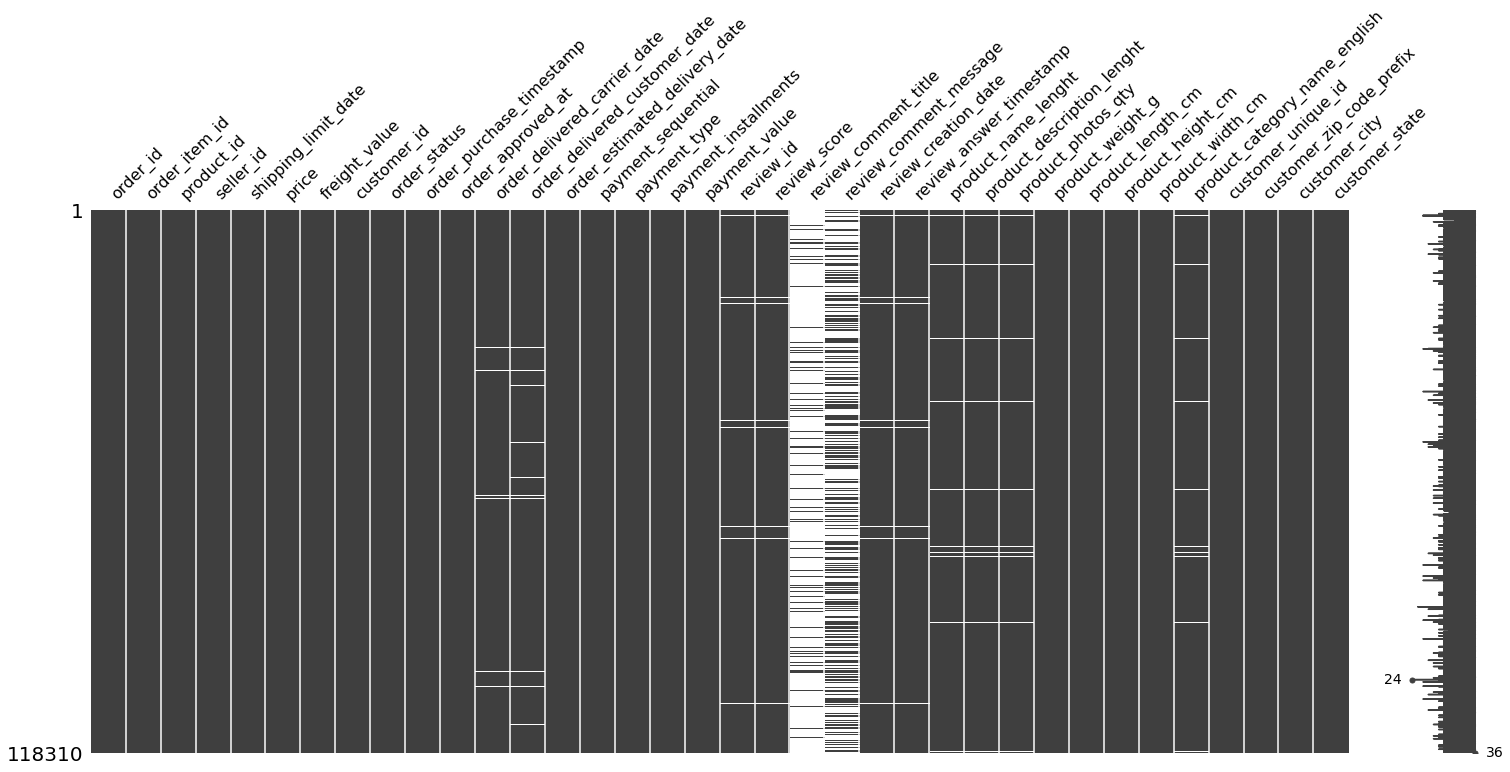

In [21]:
msno.matrix(products_orders_customers);

__Conlusion__ : Since we know that missing values on important features like `customer_uniqe_id`, `product_id`, `price`, `timestamp` are not null, I think its gonna safe to process to the EDA

## Data Types

In [33]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    products_orders_customers[col] = pd.to_datetime(products_orders_customers[col])
    
# Extracting attributes for purchase date - Year and Month
products_orders_customers['order_purchase_year'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.year)
products_orders_customers['order_purchase_month'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.month)
products_orders_customers['order_purchase_month_name'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
products_orders_customers['order_purchase_year_month'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
products_orders_customers['order_purchase_date'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
products_orders_customers['order_purchase_day'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.day)
products_orders_customers['order_purchase_dayofweek'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
products_orders_customers['order_purchase_dayofweek_name'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
products_orders_customers['order_purchase_hour'] = products_orders_customers['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
products_orders_customers['order_purchase_time_day'] = pd.cut(products_orders_customers['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
products_orders_customers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017,9,Sep,201709,20170913,13,2,Wed,8,Morning
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017,4,Apr,201704,20170426,26,2,Wed,10,Morning
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018,1,Jan,201801,20180114,14,6,Sun,14,Afternoon
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018,8,Aug,201808,20180808,8,2,Wed,10,Morning
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017,2,Feb,201702,20170204,4,5,Sat,13,Afternoon


# EDA

## General Analytics

In [28]:
def format_spines(ax, right_border=True):
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):
    
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    format_spines(ax, right_border=False)

    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')

Text(0.5, 1.0, 'Total Order on E-Commerce')

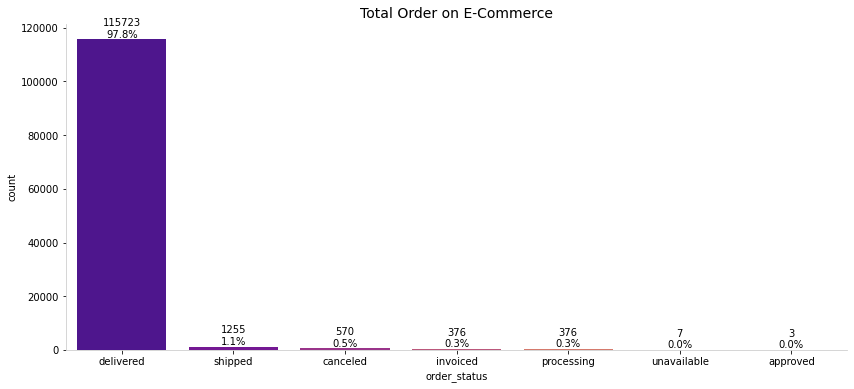

In [42]:
fig, ax = plt.subplots(figsize=(14, 6))
single_countplot(products_orders_customers, x='order_status', ax=ax)
plt.title("Total Order on E-Commerce", fontsize=14)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


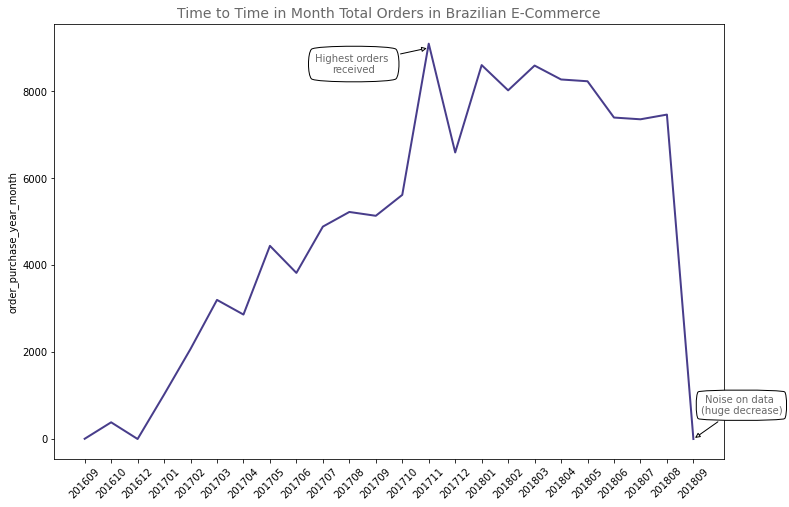

In [72]:
fig,ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=products_orders_customers['order_purchase_year_month'].value_counts().sort_index(), 
             color='darkslateblue', linewidth=2)
ax.annotate(f'Highest orders \nreceived', (13, 9000), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title('Time to Time in Month Total Orders in Brazilian E-Commerce', size=14, color='dimgrey');

Text(0.5, 1.0, 'Total Orders by Day of Week')

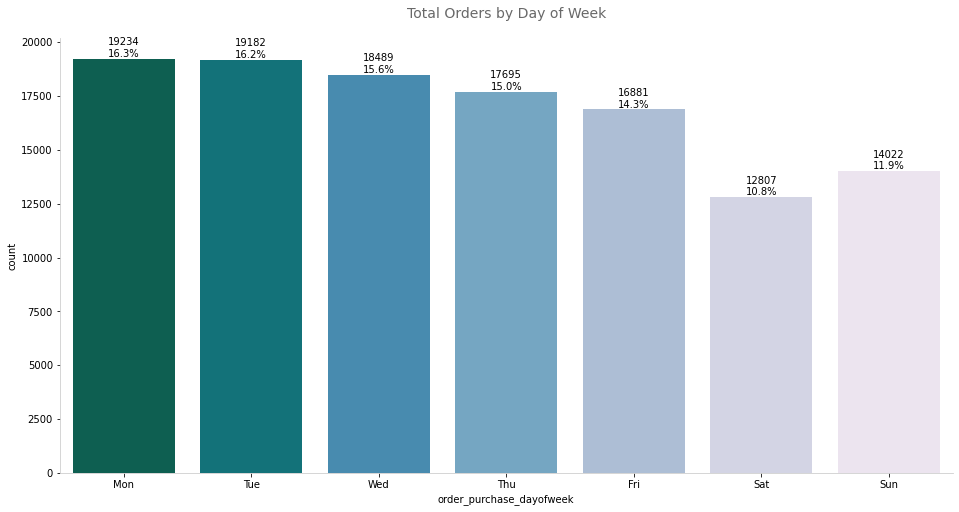

In [71]:
fig,ax = plt.subplots(figsize=(16,8))
single_countplot(products_orders_customers, x='order_purchase_dayofweek', ax=ax, order=False, palette='PuBuGn_r')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(weekday_label)
ax.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

Text(0.5, 1.0, 'Total Orders by Time of the Day')

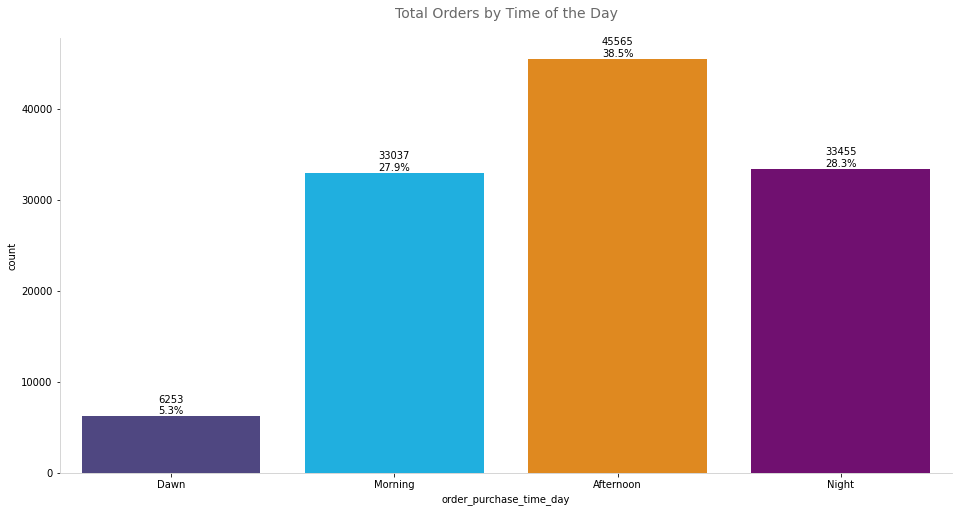

In [77]:
fig,ax = plt.subplots(figsize=(16,8))
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(products_orders_customers, x='order_purchase_time_day', ax=ax, order=False, palette=day_color_list)
ax.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

c:\users\itsec asia\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


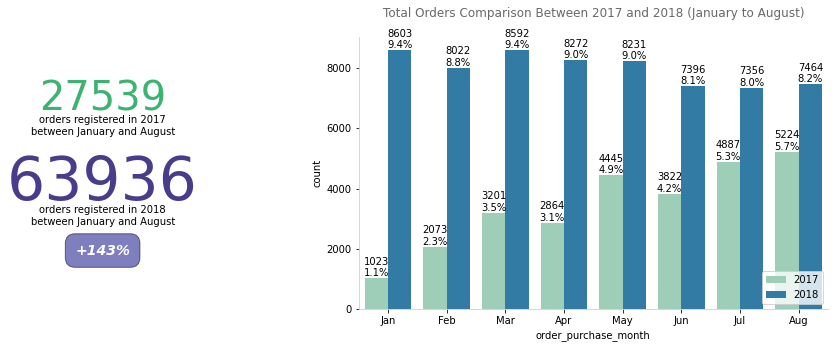

In [78]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on e-commerce orders between 2017 and 2018
comparing = products_orders_customers.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = comparing['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax1.text(0.00, 0.73, f'{year_orders[2017]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.00, 0.64, 'orders registered in 2017\nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.00, 0.31, 'orders registered in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2018
single_countplot(comparing, x='order_purchase_month', hue='order_purchase_year', ax=ax2, order=False,
                 palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')
plt.show()

## Geolocations Analytics

In [147]:
geos = dataframes['geolocation_dataset']

In [148]:
geos

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [151]:
# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = geos[geos.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geos[geos.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geos[geos.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geos[geos.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

In [154]:
geo_group

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.551427,-46.634410,sao paulo,SP
1,1002,-23.548878,-46.636361,sao paulo,SP
2,1003,-23.549083,-46.637157,sao paulo,SP
3,1004,-23.550765,-46.635371,sao paulo,SP
4,1005,-23.549980,-46.638411,sao paulo,SP
...,...,...,...,...,...
19005,99960,-27.954114,-52.031943,charrua,RS
19006,99965,-28.210845,-52.059927,agua santa,RS
19007,99970,-28.348616,-51.879243,ciriaco,RS
19008,99980,-28.418178,-51.850755,david canabarro,RS


In [189]:
# Merging all the informations
prod_all = products_orders_customers.merge(br_info, how='left', left_on='customer_state', right_on='sigla').merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')

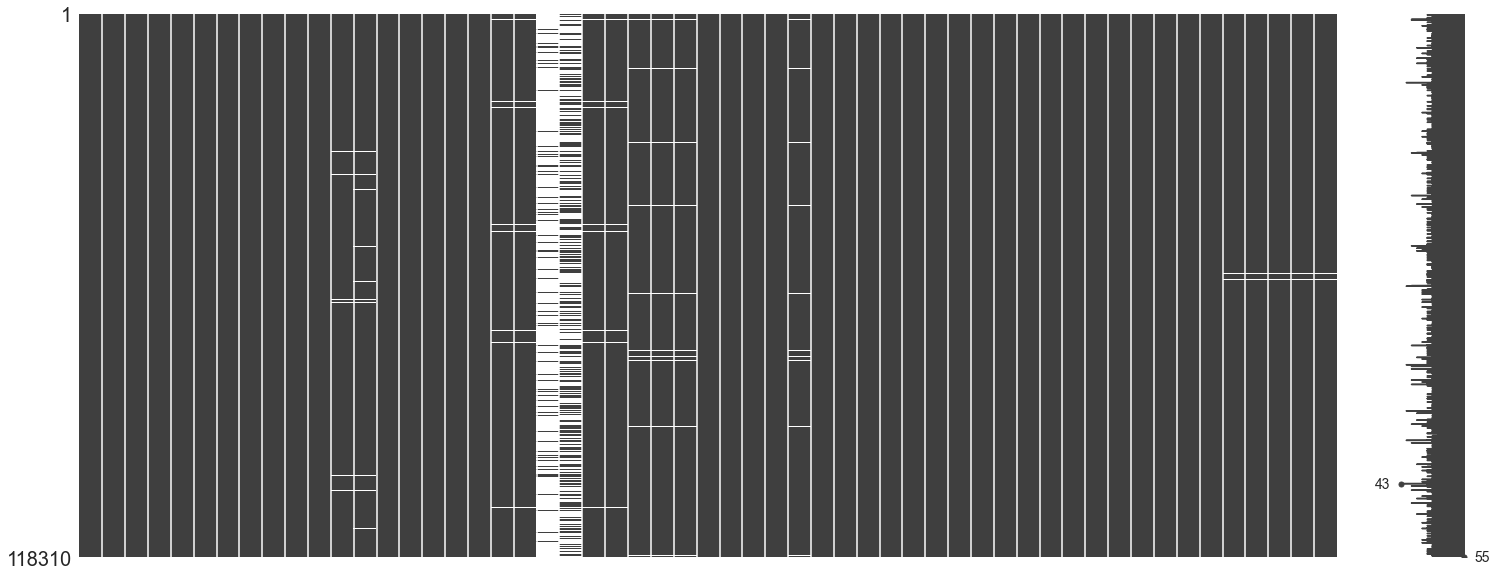

In [153]:
msno.matrix(prod_all);

In [156]:
prod_all

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,id,sigla,nome,nome_regiao,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017,9,Sep,201709,20170913,13,2,Wed,8,Morning,33,RJ,Rio de Janeiro,Sudeste,28013.0,-21.842371,-41.324836,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017,4,Apr,201704,20170426,26,2,Wed,10,Morning,35,SP,São Paulo,Sudeste,15775.0,-22.944792,-50.945331,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018,1,Jan,201801,20180114,14,6,Sun,14,Afternoon,31,MG,Minas Gerais,Sudeste,35661.0,-19.918485,-44.625509,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018,8,Aug,201808,20180808,8,2,Wed,10,Morning,35,SP,São Paulo,Sudeste,12952.0,-23.144923,-46.674795,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,59.0,409.0

In [96]:
# Grouping data by region
df_regions_group = prod_all.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False) \
                                .agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city (top 10)
df_cities_group = prod_all.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


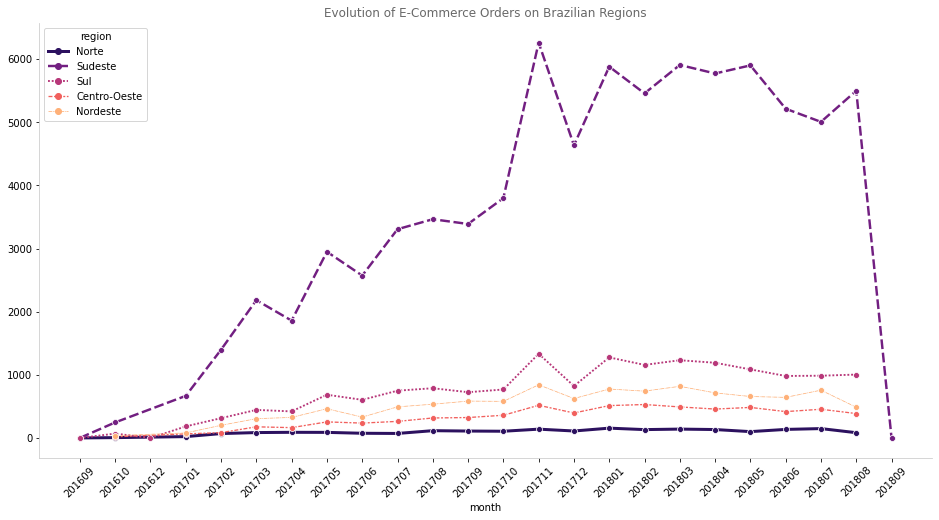

In [106]:

fig,ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='month', y='order_count', ax=ax, data=df_regions_group, hue='region', 
             size='region', style='region', palette='magma', markers=['o'] * 5)
format_spines(ax, right_border=False)
ax.set_title('Evolution of E-Commerce Orders on Brazilian Regions', size=12, color='dimgrey')
ax.set_ylabel('')
for tick in ax.get_xticklabels():
    tick.set_rotation(45);

Text(0, 0.5, '')

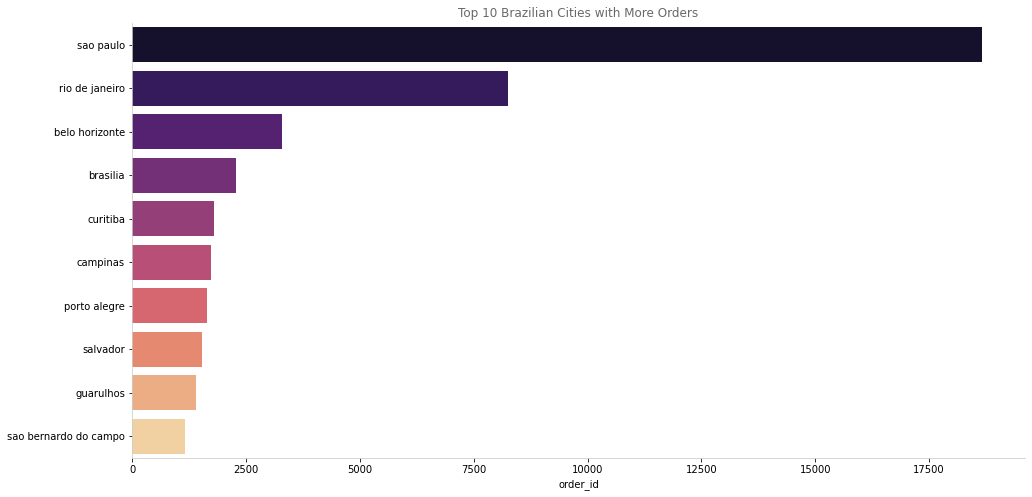

In [110]:
# Top cities with more customers orders in Brazil
fig,ax = plt.subplots(figsize=(16,8))
sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, ax=ax, palette='magma')
format_spines(ax, right_border=False)
ax.set_title('Top 10 Brazilian Cities with More Orders', size=12, color='dimgrey')
ax.set_ylabel('')

In [117]:
sns.set_style("whitegrid")

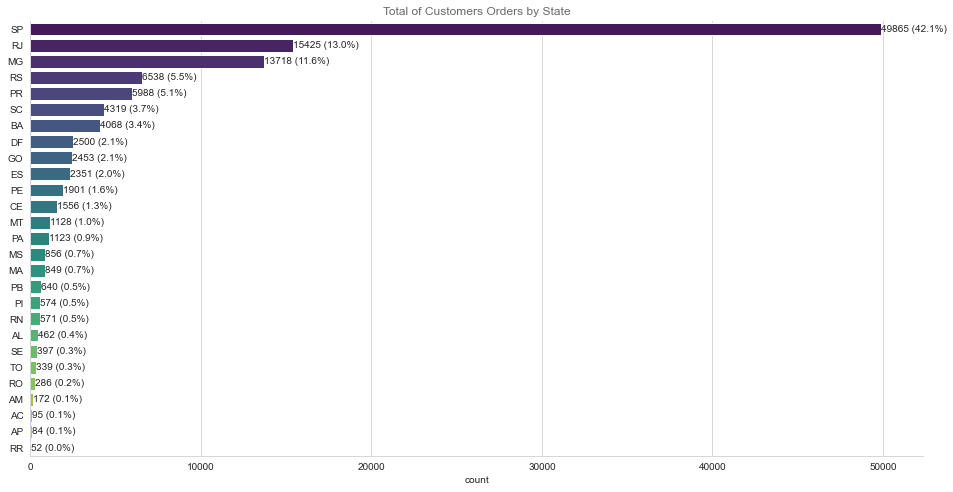

In [118]:
# Total orders by state
fig,ax = plt.subplots(figsize=(16,8))

single_countplot(y='customer_state', ax=ax, df=prod_all, palette='viridis')
ax.set_title('Total of Customers Orders by State', size=12, color='dimgrey')
ax.set_ylabel('');

In [119]:
peta = geopandas.read_file("brazilian.geojson")
prod_all['geolocation_zip_code_prefix'] = prod_all['geolocation_zip_code_prefix'].dropna().astype(int)

In [ ]:
peta.plot(figsize=(15,10), alpha=0.5, edgecolor='k')
plt.scatter(df[df['price'] < 335]['longitude'], df[df['price'] < 335]['latitude'], c=df[df['price'] < 335]['price'], 
            cmap='jet', edgecolor='black', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('price')
plt.title('Hotel Price Distribution in New York')
plt.savefig('Hotel Price Distribution in New York.png')
plt.show()

In [136]:
rev = prod_all.groupby('customer_zip_code_prefix')['price'].sum().to_frame().reset_index() \
                        .join(prod_all[["geolocation_zip_code_prefix", 'geolocation_lng', "geolocation_lat"]])

rev

,customer_zip_code_prefix,price,geolocation_zip_code_prefix,geolocation_lng,geolocation_lat
0,1003,89.99,28013.0,-41.324836,-21.842371
1,1004,178.99,15775.0,-50.945331,-22.944792
2,1005,490.59,35661.0,-44.625509,-19.918485
3,1006,834.80,12952.0,-46.674795,-23.144923
4,1007,455.48,13226.0,-46.835690,-23.249008
...,...,...,...,...,...
14971,99960,125.00,9560.0,-46.558463,-23.643600
14972,99965,163.90,9560.0,-46.558463,-23.643600
14973,99970,229.00,13060.0,-47.157259,-22.950341
14974,99980,167.88,17890.0,-51.449246,-21.522613


<AxesSubplot:>

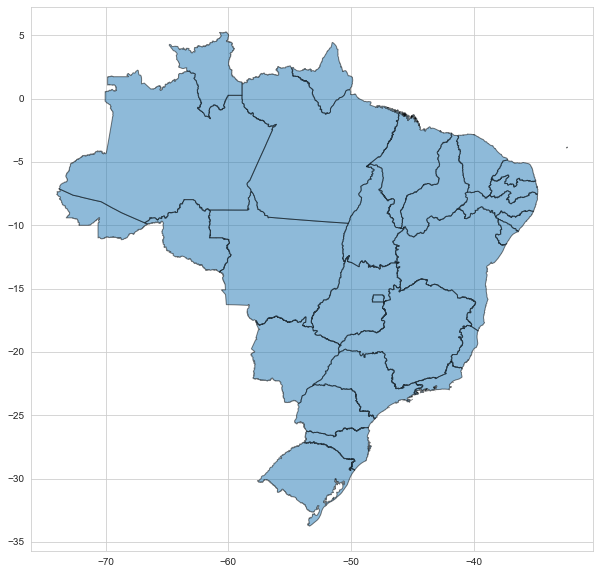

In [140]:
peta.plot(figsize=(15,10), alpha=0.5, edgecolor='k')

In [161]:
rev['geolocation_lng']

0       -41.324836
1       -50.945331
2       -44.625509
3       -46.674795
4       -46.835690
           ...    
14971   -46.558463
14972   -46.558463
14973   -47.157259
14974   -51.449246
14975   -49.033061
Name: geolocation_lng, Length: 14976, dtype: float64

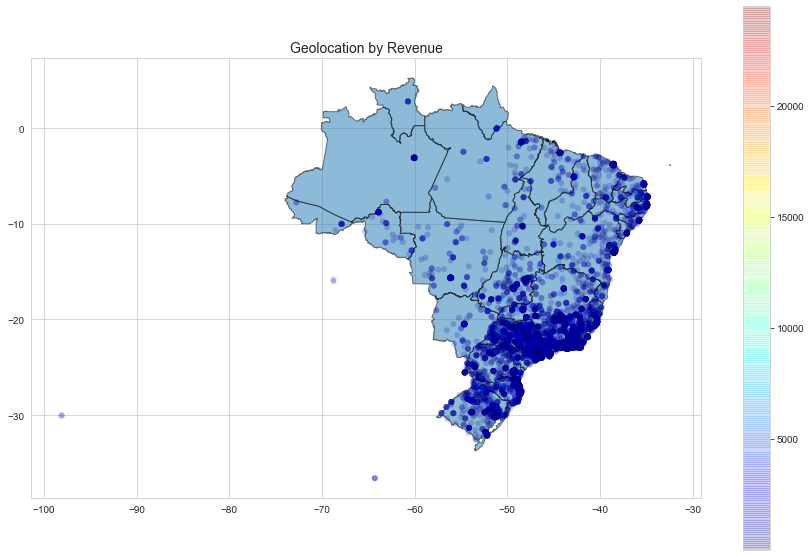

In [172]:
peta.plot(figsize=(15,10), alpha=0.5, edgecolor='k')
plt.scatter(rev['geolocation_lng'],
            rev['geolocation_lat'],
            c=rev['price'].values,
            cmap='jet', edgecolor='black', linewidth=0.02, alpha=0.2)
cbar = plt.colorbar()
plt.title("Geolocation by Revenue", fontsize=14);

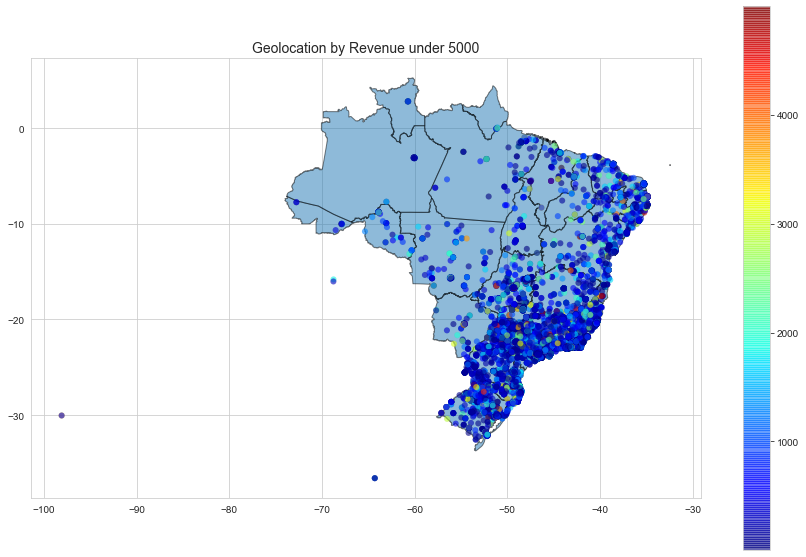

In [176]:
peta.plot(figsize=(15,10), alpha=0.5, edgecolor='k')
plt.scatter(rev[rev['price'] < 5000]['geolocation_lng'],
            rev[rev['price'] < 5000]['geolocation_lat'],
            c=rev[rev['price'] < 5000]['price'].values,
            cmap='jet', edgecolor='black', linewidth=0.02, alpha=0.6)
cbar = plt.colorbar()
plt.title("Geolocation by Revenue under 5000", fontsize=14);

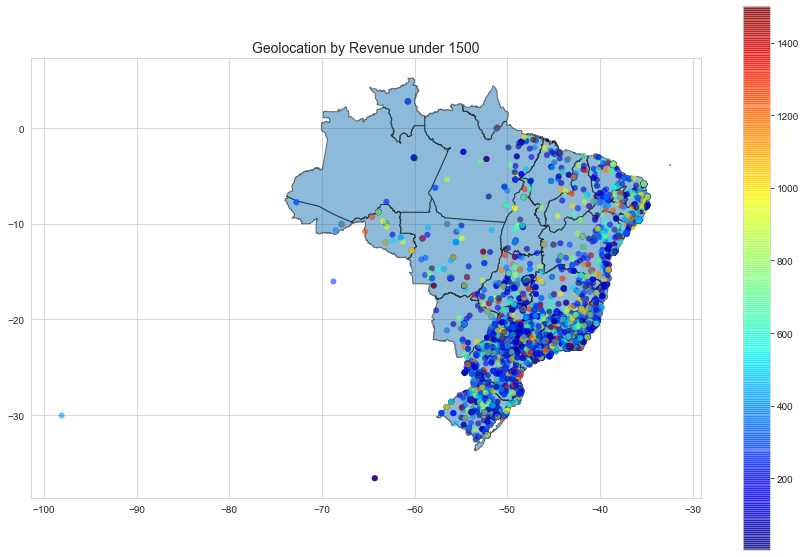

In [179]:
peta.plot(figsize=(15,10), alpha=0.5, edgecolor='k')
plt.scatter(rev[rev['price'] < 1500]['geolocation_lng'],
            rev[rev['price'] < 1500]['geolocation_lat'],
            c=rev[rev['price'] < 1500]['price'].values,
            cmap='jet', edgecolor='black', linewidth=0.02, alpha=0.6)
cbar = plt.colorbar()
plt.title("Geolocation by Revenue under 1500", fontsize=14);

C:\Users\ITSEC ASIA\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Revenue Box Plot')

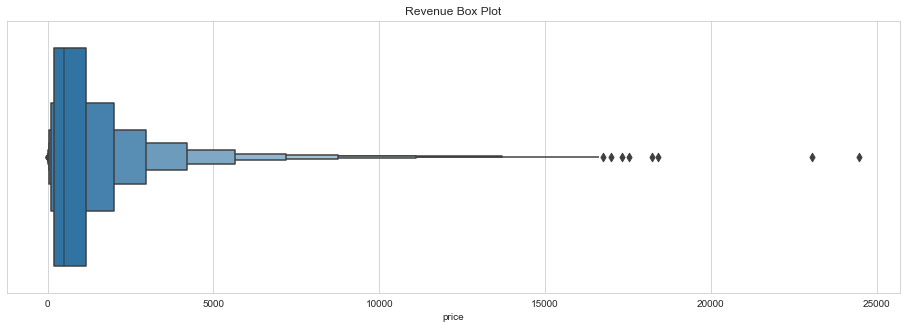

In [183]:
plt.figure(figsize=(16,5))
sns.boxenplot(rev['price'])
plt.title("Revenue Box Plot")

## Customer  (RFM) and Clustering Model

In [194]:
prod_all['order_purchase_date'] = pd.to_datetime(prod_all['order_purchase_date'])

In [195]:
prod_all["order_purchase_date"].max()

Timestamp('2018-09-03 00:00:00')

In [202]:
prod_all

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,id,sigla,nome,nome_regiao,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,Recency,Frequency_x,Frequency_y,Monetary_x,Frequency,Monetary_y
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017,9,Sep,201709,2017-09-13,13,2,Wed,8,Morning,33,RJ,Rio de Janeiro,Sudeste,28013.0,-21.842371,-41.324836,campos dos goytacazes,RJ,355,1,1,58.90,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017,4,Apr,201704,2017-04-26,26,2,Wed,10,Morning,35,SP,São Paulo,Sudeste,15775.0,-22.944792,-50.945331,santa fe do sul,SP,495,2,2,252.78,2,252.78
2,c105be01f21c9df6a2579f59b95cbcd9,1,d2f5484cbffe4ca766301b21ab9246dd,36a968b544695394e4e9d7572688598f,2017-09-22 16:27:55,12.88,11.85,02288a47f696f3054b9ef1d5f8e73973,delivered,2017-09-18 16:12:04,2017-09-18 16:27:55,2017-09-20 20:00:24,2017-09-25 21:59:46,2017-10-04,1.0,credit_card,1.0,24.73,c242eb53a2ddb13822240752d36aa9e8,5.0,NaN,ok.,2017-09-26 00:00:00,2017-09-29 11:42:53,51.0,448.0,1.0,180.0,16.0,9.0,16.0,computers_accessories,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017,9,Sep,201709,2017-09-18,18,0,Mon,16,Afternoon,35,SP,São Paulo,Sudeste,15775.0,-22.944792,-50.945331,santa fe do sul,SP,350,2,2,252.78,2,252.78
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018,1,Jan,201801,2018-01-14,14,6,Sun,14,Afternoon,31,MG,Minas Gerais,Sudeste,35661.0,-19.918485,-44.625509,para de minas,MG,232,1,1,199.00,1,199.00
4,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:

In [239]:
df_rfm = prod_all[["order_purchase_date",'customer_unique_id',"price"]]

In [240]:
# Calculate recency
last_purchase_date = df_rfm['order_purchase_date'].max()
df_rfm["Recency"] = (last_purchase_date - df_rfm["order_purchase_date"]).dt.days

#Calculate Frequency
freq_df = df_rfm.groupby("customer_unique_id").size().reset_index(name="Frequency")
df_rfm = df_rfm.merge(freq_df, on="customer_unique_id")

#Calculate Monetary
monetary_df = df_rfm.groupby("customer_unique_id")['price'].sum().reset_index(name="Monetary")
df_rfm_1 = df_rfm.merge(monetary_df, on="customer_unique_id")

<ipython-input-240-5b4ca25dbc9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm["Recency"] = (last_purchase_date - df_rfm["order_purchase_date"]).dt.days


In [245]:
# rfm ruled based
def segmen_freq(x):
    if x == 1:
        return 1
    elif x <= 4 and x > 1:
        return 2
    elif x <= 6 and x > 4:
        return 3
    elif x <= 8 and x > 6:
        return 4
    else:
        return 5

In [246]:
#using percentiles
r_labels = range(5, 0, -1)
m_labels = range(1, 6)
r_groups = pd.qcut(df_rfm_1['Recency'], q=5, labels=r_labels)
m_groups = pd.qcut(df_rfm_1['Monetary'], q=5, labels=m_labels)

#using rule=based
f_groups = df_rfm_1['Frequency'].apply(lambda x: segmen_freq(x)).astype('category')

In [247]:
df_rfm_score = df_rfm_1.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)
df_rfm_score

,order_purchase_date,customer_unique_id,price,Recency,Frequency,Monetary,R,F,M
0,2017-09-13,871766c5855e863f6eccc05f988b23cb,58.90,355,1,58.90,2,1,2
1,2017-04-26,eb28e67c4c0b83846050ddfb8a35d051,239.90,495,2,252.78,1,2,5
2,2017-09-18,eb28e67c4c0b83846050ddfb8a35d051,12.88,350,2,252.78,2,2,5
3,2018-01-14,3818d81c6709e39d06b2738a8d3a2474,199.00,232,1,199.00,3,1,4
4,2018-08-08,af861d436cfc08b2c2ddefd0ba074622,12.99,26,1,12.99,5,1,1
...,...,...,...,...,...,...,...,...,...
118305,2018-04-23,0c9aeda10a71f369396d0c04dce13a64,299.99,133,1,299.99,4,1,5
118306,2018-07-14,0da9fe112eae0c74d3ba1fe16de0988b,350.00,51,1,350.00,5,1,5
118307,2017-10-23,cd79b407828f02fdbba457111c38e4c4,99.90,315,1,99.90,2,1,3
118308,2017-08-14,eb803377c9315b564bdedad672039306,55.99,385,1,55.99,2,1,2


In [244]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [248]:
df_rfm_score['RFM_Score'] = df_rfm_score[['R','F','M']].sum(axis=1)
df_rfm_score.head(10)

,order_purchase_date,customer_unique_id,price,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,2017-09-13,871766c5855e863f6eccc05f988b23cb,58.90,355,1,58.90,2,1,2,5
1,2017-04-26,eb28e67c4c0b83846050ddfb8a35d051,239.90,495,2,252.78,1,2,5,8
2,2017-09-18,eb28e67c4c0b83846050ddfb8a35d051,12.88,350,2,252.78,2,2,5,9
3,2018-01-14,3818d81c6709e39d06b2738a8d3a2474,199.00,232,1,199.00,3,1,4,8
4,2018-08-08,af861d436cfc08b2c2ddefd0ba074622,12.99,26,1,12.99,5,1,1,7
5,2017-02-04,64b576fb70d441e8f1b2d7d446e483c5,199.90,576,1,199.90,1,1,4,6
6,2017-05-15,85c835d128beae5b4ce8602c491bf385,21.90,476,1,21.90,1,1,1,3
7,2017-12-10,635d9ac1680f03288e72ada3a1035803,19.90,267,1,19.90,3,1,1,5
8,2018-07-04,fda4476abb6307ab3c415b7e6d026526,810.00,61,1,810.00,5,1,5,11
9,2018-03-19,639d23421f5517f69d0c3d6e6564cf0e,145.95,168,1,145.95,4,1,4,9


In [249]:
df_rfm_score['RFM'] = df_rfm_score.R.astype(str)+ df_rfm_score.F.astype(str) + df_rfm_score.M.astype(str)
df_rfm_score

,order_purchase_date,customer_unique_id,price,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM
0,2017-09-13,871766c5855e863f6eccc05f988b23cb,58.90,355,1,58.90,2,1,2,5,212
1,2017-04-26,eb28e67c4c0b83846050ddfb8a35d051,239.90,495,2,252.78,1,2,5,8,125
2,2017-09-18,eb28e67c4c0b83846050ddfb8a35d051,12.88,350,2,252.78,2,2,5,9,225
3,2018-01-14,3818d81c6709e39d06b2738a8d3a2474,199.00,232,1,199.00,3,1,4,8,314
4,2018-08-08,af861d436cfc08b2c2ddefd0ba074622,12.99,26,1,12.99,5,1,1,7,511
...,...,...,...,...,...,...,...,...,...,...,...
118305,2018-04-23,0c9aeda10a71f369396d0c04dce13a64,299.99,133,1,299.99,4,1,5,10,415
118306,2018-07-14,0da9fe112eae0c74d3ba1fe16de0988b,350.00,51,1,350.00,5,1,5,11,515
118307,2017-10-23,cd79b407828f02fdbba457111c38e4c4,99.90,315,1,99.90,2,1,3,6,213
118308,2017-08-14,eb803377c9315b564bdedad672039306,55.99,385,1,55.99,2,1,2,5,212


In [250]:
df_rfm_score['Segment'] = df_rfm_score['R'].astype(str) + df_rfm_score['F'].astype(str) + df_rfm_score['M'].astype(str)
df_rfm_score['Segment'] = df_rfm_score['Segment'].replace(seg_map, regex=True)
df_rfm_score.head(10)

,order_purchase_date,customer_unique_id,price,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM,Segment
0,2017-09-13,871766c5855e863f6eccc05f988b23cb,58.90,355,1,58.90,2,1,2,5,212,Hibernating customers
1,2017-04-26,eb28e67c4c0b83846050ddfb8a35d051,239.90,495,2,252.78,1,2,5,8,125,At Risk
2,2017-09-18,eb28e67c4c0b83846050ddfb8a35d051,12.88,350,2,252.78,2,2,5,9,225,At Risk
3,2018-01-14,3818d81c6709e39d06b2738a8d3a2474,199.00,232,1,199.00,3,1,4,8,314,Promising
4,2018-08-08,af861d436cfc08b2c2ddefd0ba074622,12.99,26,1,12.99,5,1,1,7,511,New Customers
5,2017-02-04,64b576fb70d441e8f1b2d7d446e483c5,199.90,576,1,199.90,1,1,4,6,114,Cannot Lose Them
6,2017-05-15,85c835d128beae5b4ce8602c491bf385,21.90,476,1,21.90,1,1,1,3,111,Lost customers
7,2017-12-10,635d9ac1680f03288e72ada3a1035803,19.90,267,1,19.90,3,1,1,5,311,New Customers
8,2018-07-04,fda4476abb6307ab3c415b7e6d026526,810.00,61,1,810.00,5,1,5,11,515,Promising
9,2018-03-19,639d23421f5517f69d0c3d6e6564cf0e,145.95,168,1,145.95,4,1,4,9,414,Promising


### Ratio

In [252]:
rfm_stats = df_rfm_score.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
})/ round(1)

In [255]:
rfm_stats['Ratio']= (100*rfm_stats['Monetary']["count"]/rfm_stats['Monetary']["count"].sum()).round(2)
rfm_stats = rfm_stats.sort_values(by='Ratio')
rfm_stats.style.background_gradient(cmap='PuBuGn')

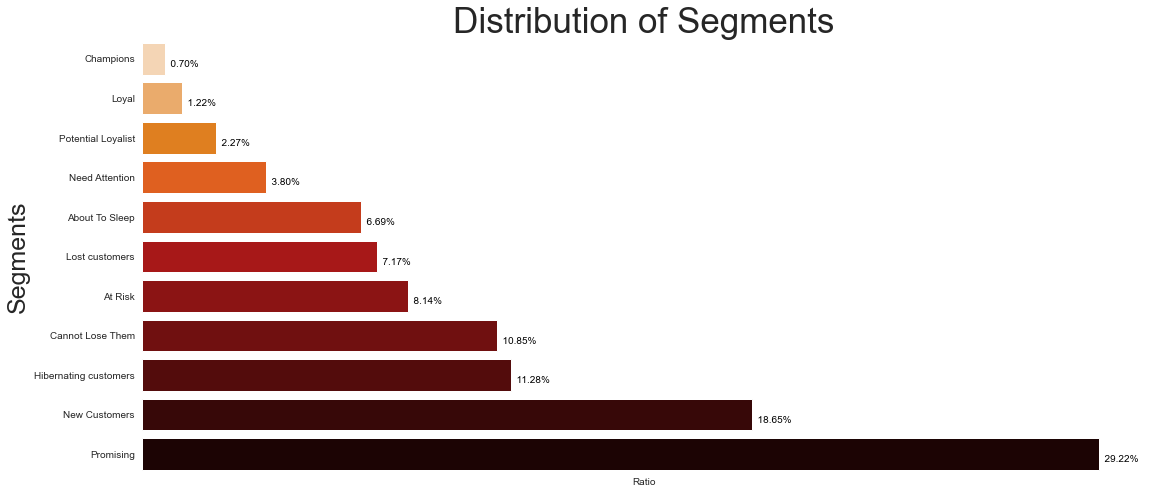

In [259]:
plt.figure(figsize=(18,8))

per= sns.barplot(x=rfm_stats['Ratio'], y=rfm_stats.index, data=rfm_stats, palette="gist_heat_r")
sns.despine(bottom = True, left = True)
for i, v in enumerate(rfm_stats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

### RFM

C:\Users\ITSEC ASIA\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ITSEC ASIA\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ITSEC ASIA\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

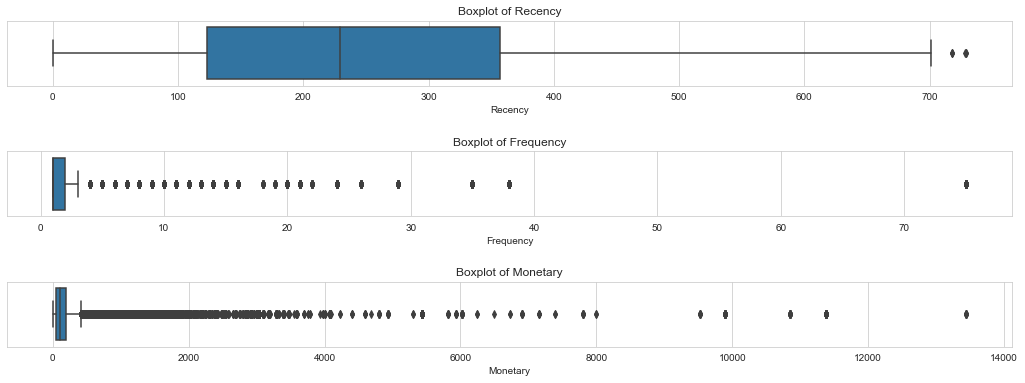

In [261]:
plt.figure(1, figsize=(18,6))

n = 0

for x in ['Recency', 'Frequency', 'Monetary']:
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = 1)
    sns.boxplot(df_rfm_score[x])
    plt.title(f"Boxplot of {x}");

<AxesSubplot:xlabel='Recency', ylabel='Count'>

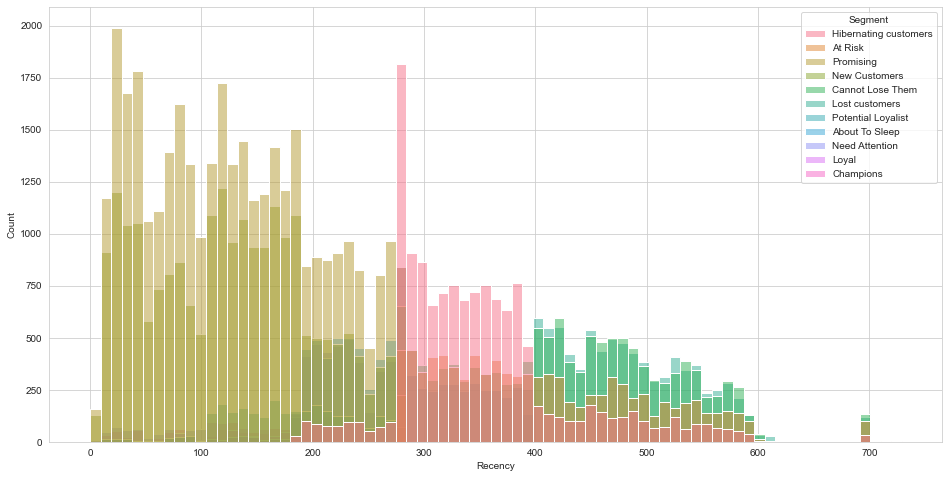

In [263]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_rfm_score, x='Recency', hue='Segment')

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

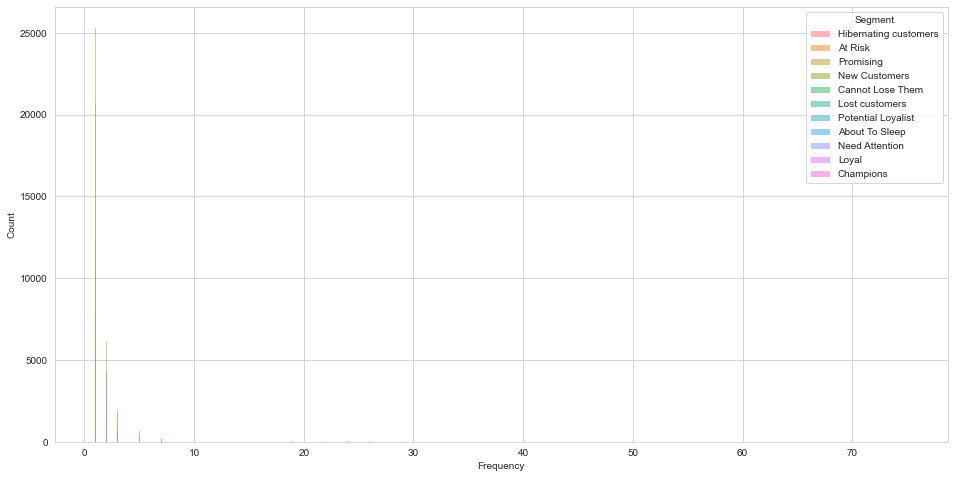

In [264]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_rfm_score, x='Frequency', hue='Segment')

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

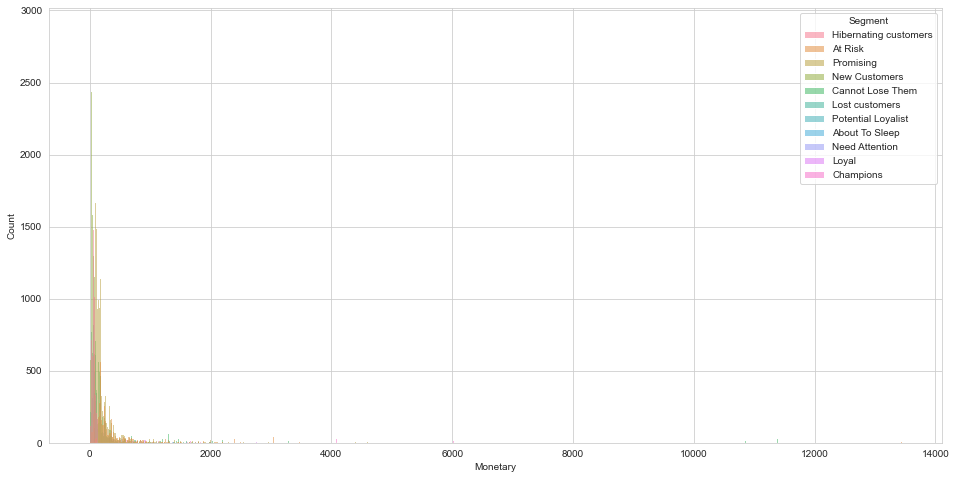

In [270]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_rfm_score, x='Monetary', hue='Segment')

### Clustering

In [271]:
from scipy import stats #library
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.figure(figsize=(14, 10))
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [285]:
kol_rfm = ["Recency","Frequency","Monetary", "customer_unique_id"]

In [286]:
df_rfm2 = df_rfm_score.copy()
df_rfm2 = df_rfm2[kol_rfm].set_index('customer_unique_id')

C:\Users\ITSEC ASIA\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


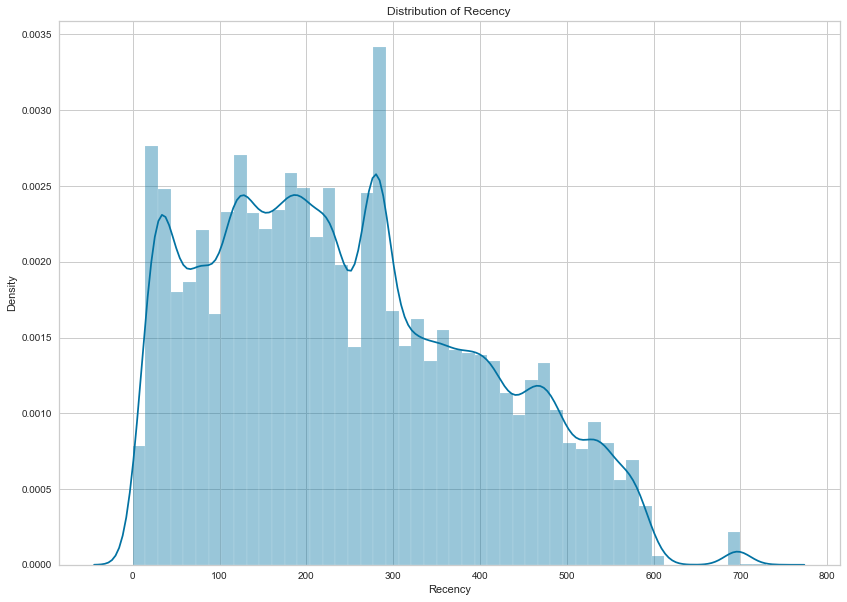

Recency's: Skew: 0.42536753757779266, : SkewtestResult(statistic=57.31800439951071, pvalue=0.0)


C:\Users\ITSEC ASIA\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


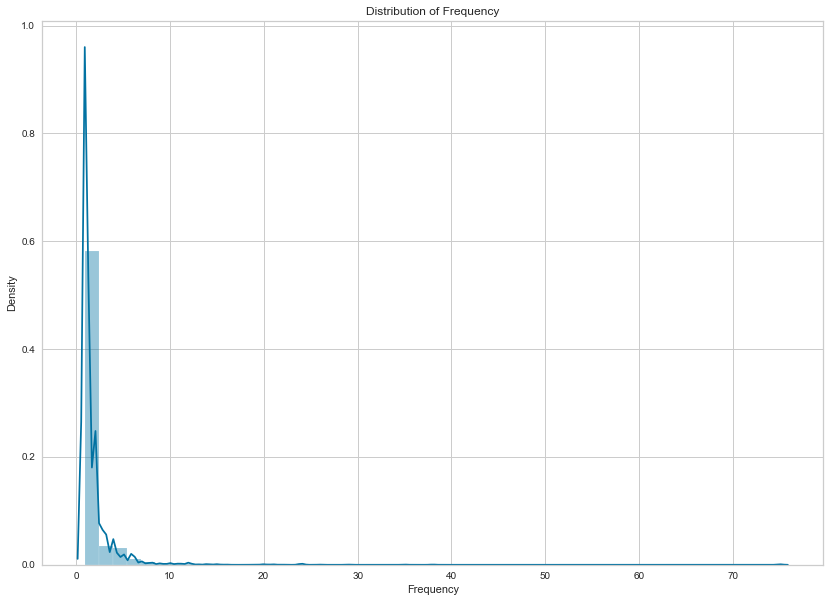

Frequency's: Skew: 13.863165654702478, : SkewtestResult(statistic=404.32127310670904, pvalue=0.0)


C:\Users\ITSEC ASIA\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


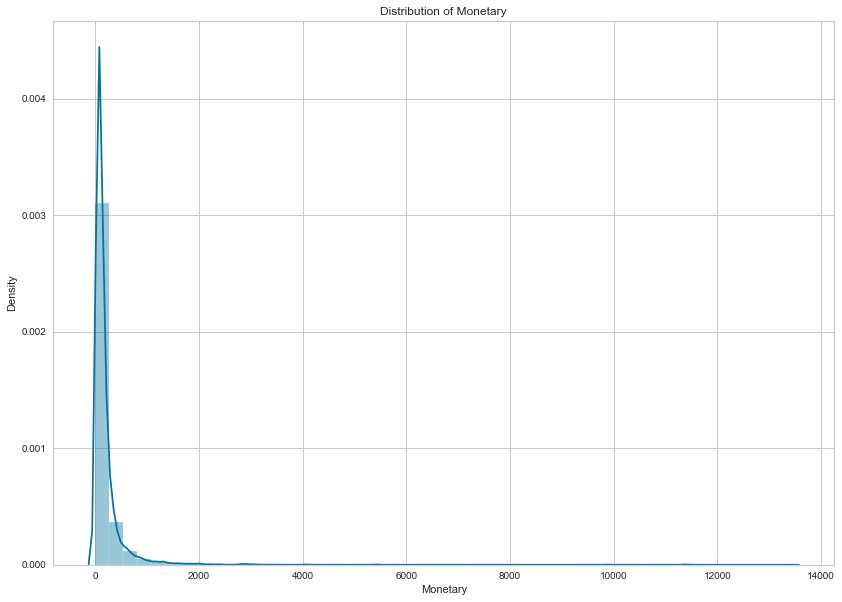

Monetary's: Skew: 13.602726661174469, : SkewtestResult(statistic=402.15033674590114, pvalue=0.0)


In [287]:
for col in df_rfm2.columns:
    check_skew(df_rfm2, col)

In [277]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [279]:
df_rfm2

,order_purchase_date,price,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM,Segment
customer_unique_id,,,,,,,,,,,
871766c5855e863f6eccc05f988b23cb,2017-09-13,58.90,355,1,58.90,2,1,2,5,212,Hibernating customers
eb28e67c4c0b83846050ddfb8a35d051,2017-04-26,239.90,495,2,252.78,1,2,5,8,125,At Risk
eb28e67c4c0b83846050ddfb8a35d051,2017-09-18,12.88,350,2,252.78,2,2,5,9,225,At Risk
3818d81c6709e39d06b2738a8d3a2474,2018-01-14,199.00,232,1,199.00,3,1,4,8,314,Promising
af861d436cfc08b2c2ddefd0ba074622,2018-08-08,12.99,26,1,12.99,5,1,1,7,511,New Customers
...,...,...,...,...,...,...,...,...,...,...,...
0c9aeda10a71f369396d0c04dce13a64,2018-04-23,299.99,133,1,299.99,4,1,5,10,415,Promising
0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14,350.00,51,1,350.00,5,1,5,11,515,Promising
cd79b407828f02fdbba457111c38e4c4,2017-10-23,99.90,315,1,99.90,2,1,3,6,213,About To Sleep


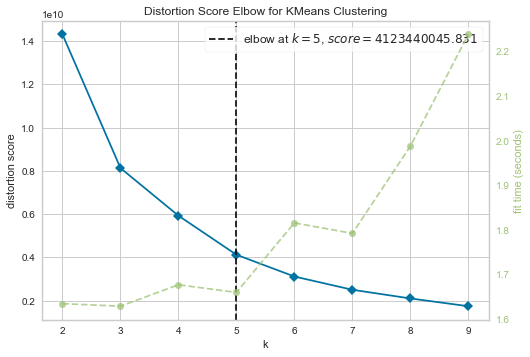

In [288]:
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 10))
elbow.fit(df_rfm2)
elbow.show()
plt.show()

In [289]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(df_rfm2)

KMeans(n_clusters=5)

In [290]:
df_rfm2['Cluster'] = k_means.labels_

In [291]:
df_rfm2.head(10)

,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,
871766c5855e863f6eccc05f988b23cb,355,1,58.90,5
eb28e67c4c0b83846050ddfb8a35d051,495,2,252.78,2
eb28e67c4c0b83846050ddfb8a35d051,350,2,252.78,6
3818d81c6709e39d06b2738a8d3a2474,232,1,199.00,5
af861d436cfc08b2c2ddefd0ba074622,26,1,12.99,0
64b576fb70d441e8f1b2d7d446e483c5,576,1,199.90,2
85c835d128beae5b4ce8602c491bf385,476,1,21.90,2
635d9ac1680f03288e72ada3a1035803,267,1,19.90,5
fda4476abb6307ab3c415b7e6d026526,61,1,810.00,4
